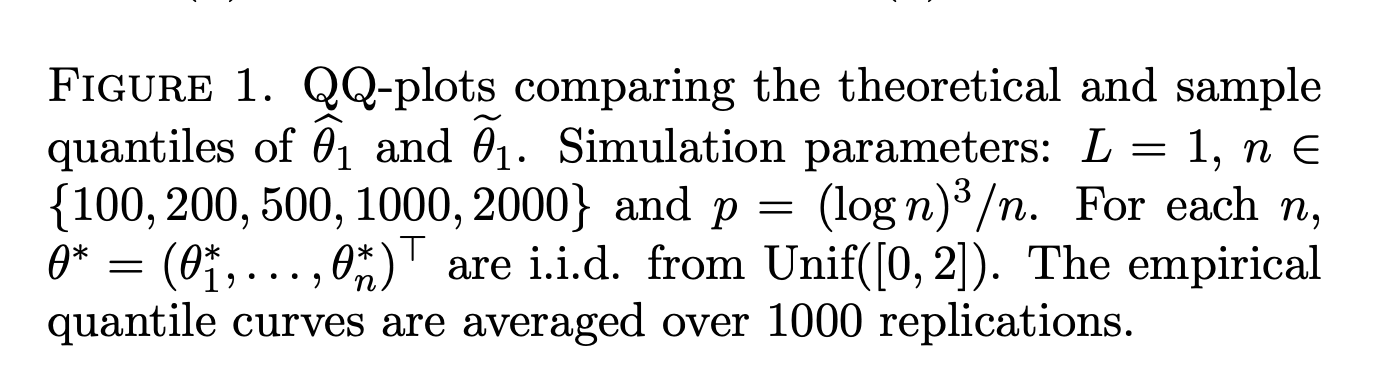


![img](pic.png)


In [9]:
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

sns.set_theme(style='darkgrid')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from btl_func import *
from btl_func_g import *
from data import *
from optim import GradientDescent
from estimate import *

data.v [-0.26964468 -0.31323496]


 45%|████▍     | 4455/10000 [00:00<00:00, 81434.10it/s]

norm v_star [ 0.02179486 -0.02179486]
norm real v [ 0.02179514 -0.02179514]
grad at true [0. 0.]
grad at star [ 7.04825356e-07 -7.04825357e-07]


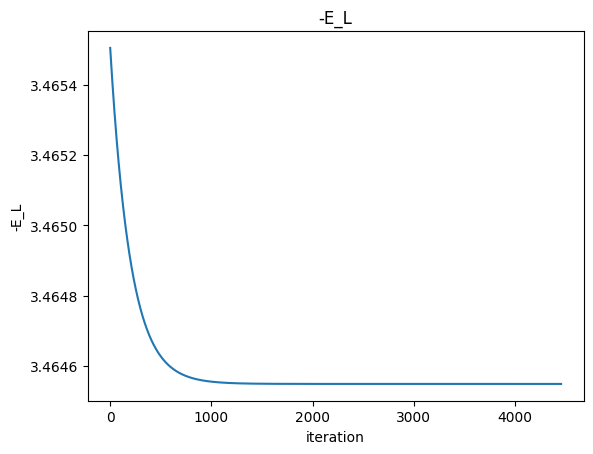

In [4]:
from utils import normalize
from matplotlib import pyplot as plt


def check_E_L():

    data = GaoData(2, 1, 5, (-1, 1))
    print("data.v", data.v)

    v_star, log_f, log_iters = GradientDescent(
        lambda v: -calc_E_L_grad(data, v),
        np.random.rand(data.p),
        alpha=1e-3,
        max_iter=10000,
        f=lambda v: -calc_E_L(data, v),
        verbose_iter=1,
    )

    print("norm v_star", normalize(v_star))

    print("norm real v", normalize(data.v))

    assert np.allclose(normalize(v_star), normalize(data.v), atol=1e-3)

    print("grad at true", calc_E_L_grad(data, data.v))
    print("grad at star", calc_E_L_grad(data, v_star))

    plt.plot(log_iters, log_f)
    plt.title("-E_L")
    plt.xlabel("iteration")
    plt.ylabel("-E_L")
    plt.show()


check_E_L()

## Check correctness of EL optimization (we have no misspecification here)


  6%|▌         | 57/1000 [00:00<00:00, 49869.70it/s]

gradient at true [0. 0.]
gradient at star [ 4.53433455e-07 -4.53433454e-07]
v_star [ 0.28761059 -0.28761059]
v_true [ 0.28761068 -0.28761068]


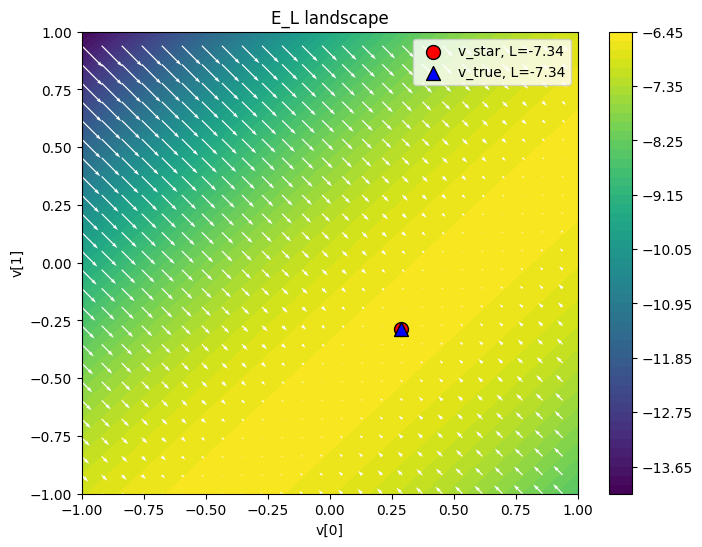

In [7]:
def plot_E_L(data):
    v_true = normalize(data.v)
    v_star = normalize(calc_v_star(data))
    # v_g_star = normalize(calc_v_g_star(data, 1))

    print("gradient at true", calc_E_L_grad(data, data.v))
    print("gradient at star", calc_E_L_grad(data, v_star))
    print("v_star", v_star)
    print("v_true", v_true)
    assert np.allclose(v_star, v_true, atol=1e-3)

    lin = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(lin, lin)
    Z = np.empty_like(X)
    U = np.empty_like(X)
    V = np.empty_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            v_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = calc_E_L(data, v_point)
            grad = calc_E_L_grad(data, v_point)
            U[i, j] = grad[0]
            V[i, j] = grad[1]

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.quiver(
        X[::4, ::4], Y[::4, ::4], U[::4, ::4], V[::4, ::4], color="white"
    )
    plt.scatter(
        v_star[0],
        v_star[1],
        s=100,
        color="red",
        marker="o",
        edgecolors="black",
        label=f"v_star, L={calc_L(data, v_star):.2f}",
    )
    plt.scatter(
        v_true[0],
        v_true[1],
        s=100,
        color="blue",
        marker="^",
        edgecolors="black",
        label=f"v_true, L={calc_L(data, v_true):.2f}",
    )

    plt.colorbar(cp)
    plt.xlabel("v[0]")
    plt.ylabel("v[1]")
    plt.title("E_L landscape")
    plt.legend()
    plt.show()


data = GaoData(2, 0.5, 10, (-1, 1))
plot_E_L(data)

without misspecification $v^\ = \arg \max E*{v*{true}}L(\theta) $ is equal to the true value.


 28%|██▊       | 277/1000 [00:00<00:00, 103512.31it/s]

true v is  [-0.50678746 -0.77411146]
grad at true [ 0.33564165 -0.33564165]


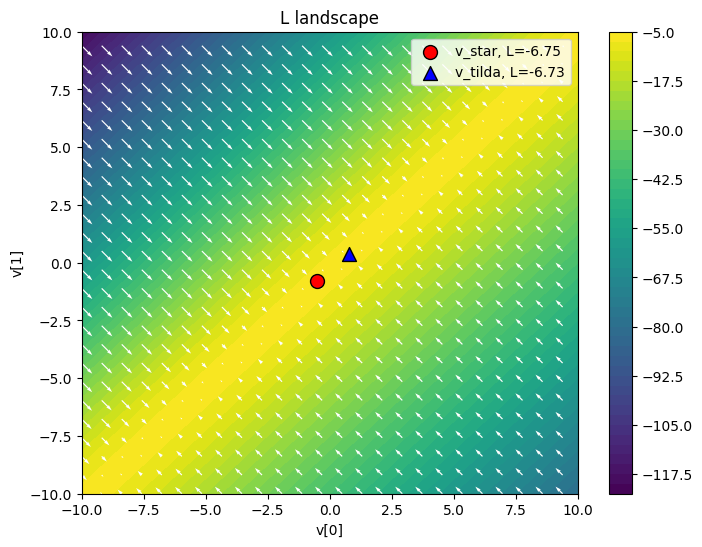

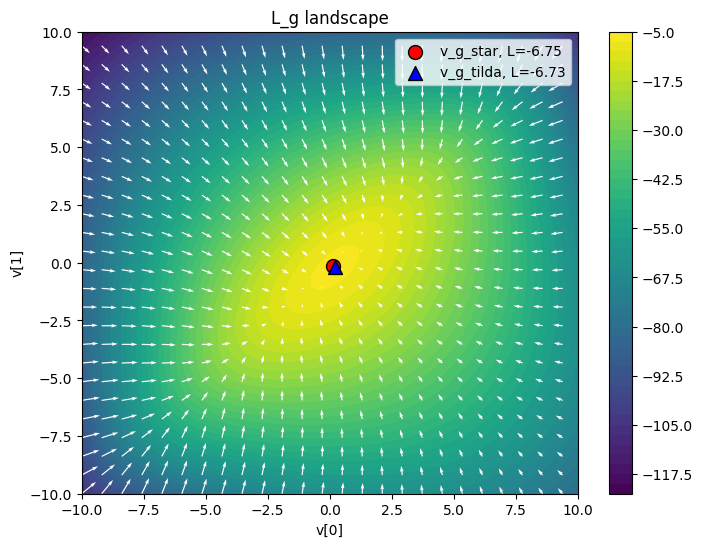

In [11]:
def plot_L(data: GaoData, g_l: float):
    v_star = data.v
    v_tilda = calc_v_tilda(data)
    v_g_star = calc_v_g_star(data, g_l)
    v_g_tilda = calc_v_g_tilda(data, g_l)

    print("true v is ", data.v)
    print("grad at true", calc_L_grad(data, data.v))
    lin = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(lin, lin)
    Z = np.empty_like(X)
    U = np.empty_like(X)
    V = np.empty_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            v_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = calc_L(data, v_point)
            grad = calc_L_grad(data, v_point)
            U[i, j] = grad[0]
            V[i, j] = grad[1]

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.quiver(
        X[::4, ::4], Y[::4, ::4], U[::4, ::4], V[::4, ::4], color="white"
    )
    plt.colorbar(cp)
    plt.xlabel("v[0]")
    plt.ylabel("v[1]")
    plt.title("L landscape")

    plt.scatter(
        v_star[0],
        v_star[1],
        s=100,
        color="red",
        marker="o",
        edgecolors="black",
        label=f"v_star, L={calc_L(data, v_star):.2f}",
    )
    plt.scatter(
        v_tilda[0],
        v_tilda[1],
        s=100,
        color="blue",
        marker="^",
        edgecolors="black",
        label=f"v_tilda, L={calc_L(data, v_tilda):.2f}",
    )
    plt.legend()
    plt.show()

    lin = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(lin, lin)
    Z = np.empty_like(X)
    U = np.empty_like(X)
    V = np.empty_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            v_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = calc_L_g(data, v_point, 1)
            grad = calc_L_g_grad(data, v_point, 1)
            U[i, j] = grad[0]
            V[i, j] = grad[1]

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.quiver(
        X[::4, ::4], Y[::4, ::4], U[::4, ::4], V[::4, ::4], color="white"
    )
    plt.colorbar(cp)
    plt.xlabel("v[0]")
    plt.ylabel("v[1]")
    plt.title("L_g landscape")

    plt.scatter(
        v_g_star[0],
        v_g_star[1],
        s=100,
        color="red",
        marker="o",
        edgecolors="black",
        label=f"v_g_star, L={calc_L(data, v_g_star):.2f}",
    )
    plt.scatter(
        v_g_tilda[0],
        v_g_tilda[1],
        s=100,
        color="blue",
        marker="^",
        edgecolors="black",
        label=f"v_g_tilda, L={calc_L(data, v_g_tilda):.2f}",
    )
    plt.legend()
    plt.show()

    return v_star, v_tilda, v_g_star, v_g_tilda


data = GaoData(2, 1, 10, (-1, 1))
v_star, v_tilda, v_g_star, v_g_tilda = plot_L(data, 1)

Here $v^*$ is a true parameter, $$v^* = \arg \max E_{v*}L(v)$$ was double checked before

regularized solution:
$$v^*_g = \arg \max E_{v*} L_g(v) $$

- we must have $L(v^*_g) = L(v^*)$,
- we must have $v^*_g = v^* - mean(v^*)$ in a non-degenerate case (the only 0 eigenvalue of fisher matrix is the vector of ones)
- we must have $\sum v^*_g = 0$

All of the above also holds for $\tilde{v}$ and $\tilde{v_g}$


In [12]:
print("v_g_star", v_g_star)
print("v_star", v_star)
print("v_g_tilda", v_g_tilda)
print("v_tilda", v_tilda)

v_g_star [ 0.13366266 -0.13366135]
v_star [-0.50678746 -0.77411146]
v_g_tilda [ 0.20273322 -0.20273189]
v_tilda [0.76261249 0.35714759]


In [17]:
assert np.allclose(calc_L(data, v_g_star), calc_L(data, v_star))
assert np.allclose(calc_L(data, v_g_tilda), calc_L(data, v_tilda))

In [16]:
assert np.allclose(v_g_star.sum(), 0, atol=1e-5)
assert np.allclose(v_g_tilda.sum(), 0, atol=1e-5)

In [18]:
assert np.allclose(v_g_star, v_star - np.mean(v_star))
assert np.allclose(v_g_tilda, v_tilda - np.mean(v_tilda))

## Constants estimation


![img2](pic2.png)


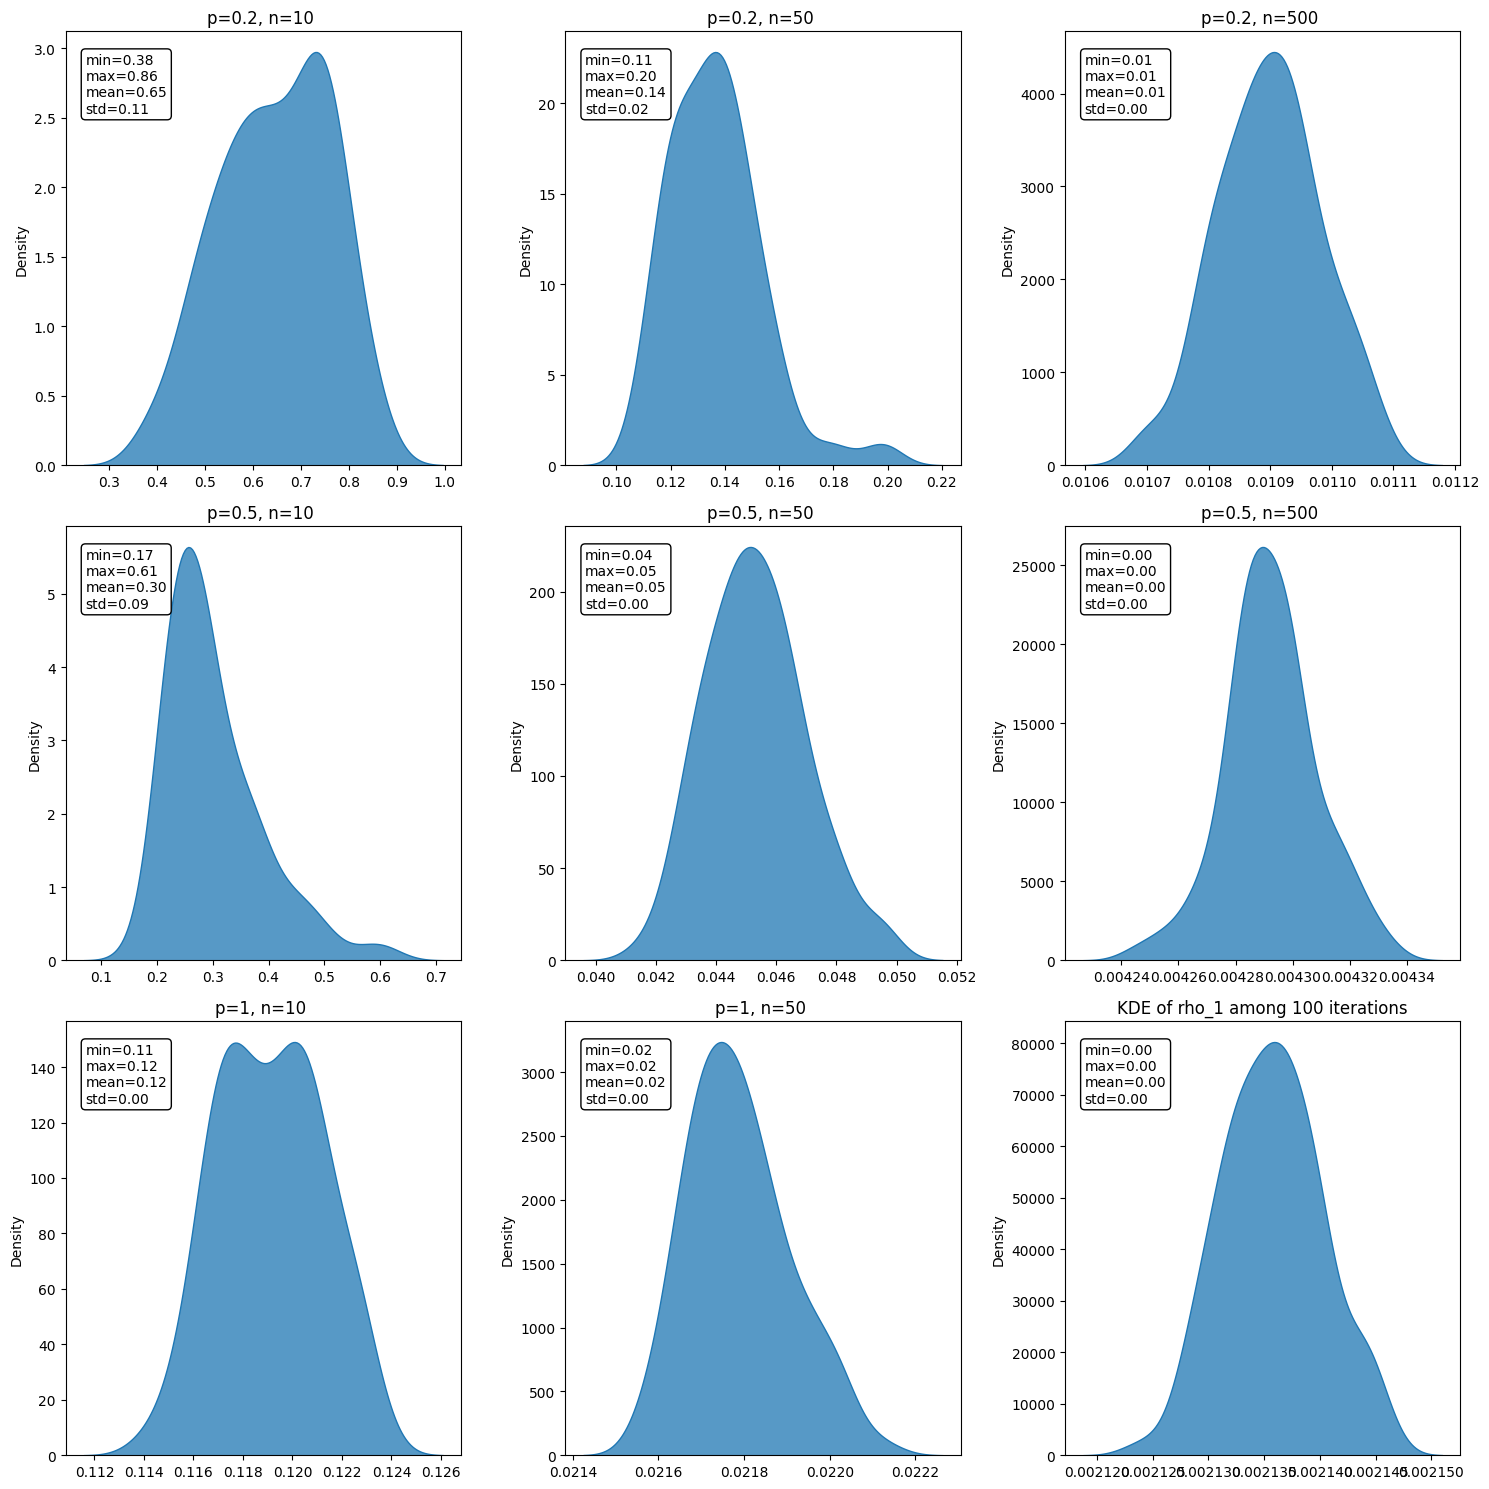

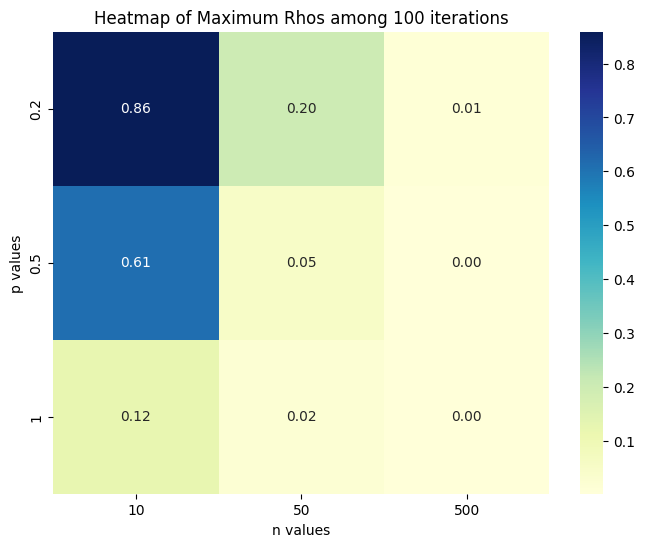

In [27]:
from constants import rho_1
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def make_rho_1_kde_and_heatmap_plots(max_iter=100):
    prob_values = [0.2, 0.5, 1]
    p_values = [10, 50, 500]
    fig_kde, axes_kde = plt.subplots(3, 3, figsize=(15, 15))
    max_rhos = np.zeros((3, 3))

    for i, p in enumerate(prob_values):
        for j, n in enumerate(p_values):
            rhos = []
            for iter in range(max_iter):
                data = GaoData(int(n), p, L=1, v_range=[0, 2])
                F_matrix = F(data.v, data.N)
                rhos.append(rho_1(F_matrix))

            ax_kde = axes_kde[i, j]
            sns.kdeplot(rhos, ax=ax_kde, fill=True, alpha=0.75)
            ax_kde.set_title(f"p={p}, n={int(n)} ")
            ax_kde.annotate(
                f"min={np.min(rhos):.2f}\nmax={np.max(rhos):.2f}\nmean={np.mean(rhos):.2f}\nstd={np.std(rhos):.2f}",
                xy=(0.05, 0.95),
                xycoords="axes fraction",
                verticalalignment="top",
                horizontalalignment="left",
                bbox=dict(
                    boxstyle="round,pad=0.3",
                    edgecolor="black",
                    facecolor="white",
                ),
            )
            max_rhos[i, j] = np.max(rhos)
    plt.title(f"KDE of rho_1 among {max_iter} iterations")
    plt.tight_layout()
    plt.show()

    # Create a heatmap for the maximum values of rhos
    fig_heatmap, ax_heatmap = plt.subplots(figsize=(8, 6))
    sns.heatmap(
        max_rhos,
        annot=True,
        fmt=".2f",
        ax=ax_heatmap,
        cmap="YlGnBu",
        xticklabels=p_values,
        yticklabels=prob_values,
    )
    ax_heatmap.set_xlabel("n values")
    ax_heatmap.set_ylabel("p values")
    ax_heatmap.set_title(f"Heatmap of Maximum Rhos among {max_iter} iterations")
    plt.show()


make_rho_1_kde_and_heatmap_plots(100)

100%|██████████| 7/7 [00:42<00:00,  6.14s/it]


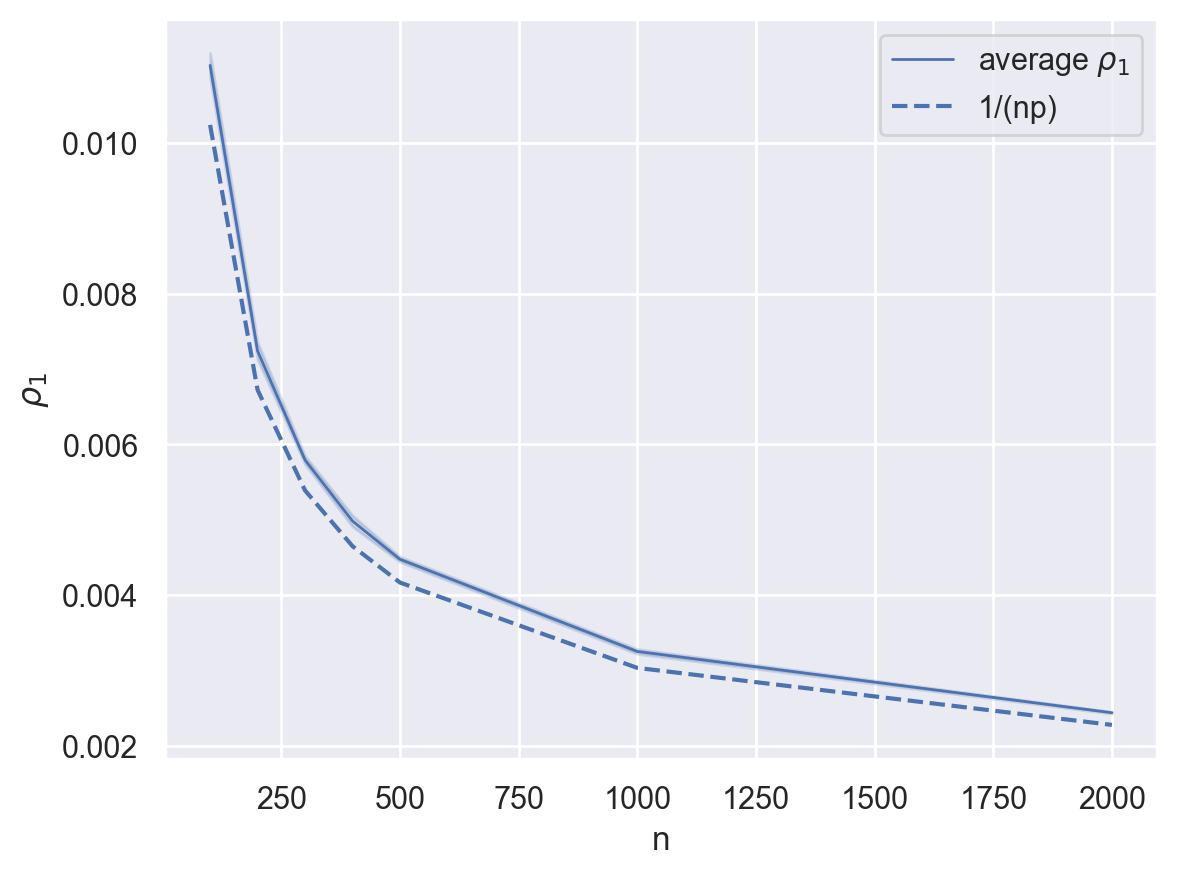

In [ ]:
from tqdm.auto import tqdm
import numpy as np
from constants import rho_1
from matplotlib import pyplot as plt


# TODO rename to rho_1 squared everywhere


def sample_rho(n, p):
    data = GaoData(int(n), p, L=1, v_range=[0, 2])
    F_matrix = F(data.v, data.N)
    return rho_1(F_matrix)


def plot_rho(p, max_iter=10):
    ns = [100, 200, 300, 400, 500, 1000, 2000]
    means = []
    stds = []
    inv_np = []
    for n in tqdm(ns):
        rhos = [sample_rho(n, p(n)) for _ in range(max_iter)]
        means.append(np.mean(rhos))
        stds.append(np.std(rhos))
        inv_np.append(1 / (n * p(n)))

    means = np.array(means)
    stds = np.array(stds)

    plt.plot(ns, means, "b-", linewidth=1, label=r"average $\rho_1$")
    plt.fill_between(
        ns, means - 3 * stds, means + 3 * stds, color="b", alpha=0.2
    )
    plt.plot(ns, inv_np, label="1/(np)", linestyle="--")
    plt.xlabel("n")
    plt.ylabel(r"$\rho_1$")
    plt.legend()
    plt.show()


plot_rho(lambda n: (np.log(n) ** 3) / n)